<a href="https://colab.research.google.com/github/Gbell26/Tensor_Flow2.0_Course/blob/main/TF2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Get data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-12-21 16:04:48--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-12-21 16:04:48 (20.5 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [ ]:
#load in data

In [ ]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [ ]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [ ]:
X = data[:,0].reshape(-1,1) # making an N x D array
Y = data[:,1]

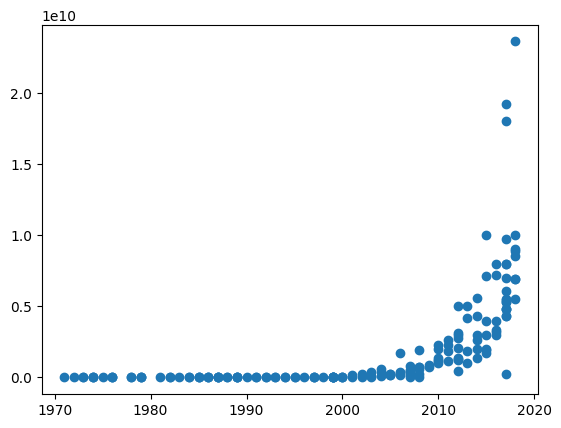

In [ ]:
plt.scatter(X,Y);

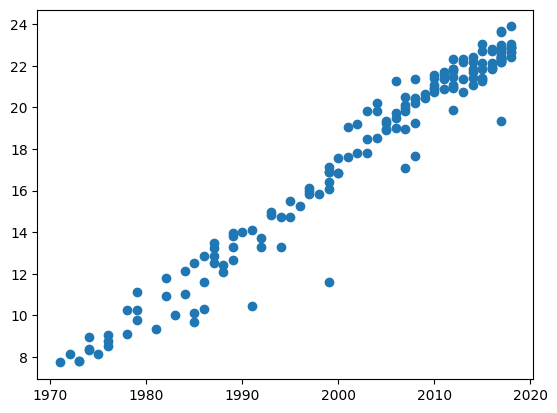

In [ ]:
Y = np.log(Y)
plt.scatter(X,Y);

In [ ]:
# Give zero mean by subtracting the mean OR divide by sd
X = X - X.mean()
X

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086],
       [-26.19753086],
       [-24.19753086],
       [-24.19753086],
       [-23.19753086],
       [-23.19753086],
       [-23.19753086],
       [-21.19753086],
       [-20.19753086],
       [-20.19753086],
       [-19.19753086],
       [-18.19753086],
       [-18.19753086],
       [-17.19753086],
       [-17.19753086],
       [-17.19753086],
       [-16.19753086],
       [-16.19753086],
       [-16.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-14.19753086],
       [-14.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-12.19753086],
       [-11.19753086],
       [-11.19753086],
       [-10.19753086],
       [-10.19753086],
       [ -9

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse',
)

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X,Y,epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 334.9552 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 332.6212 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 314.8087 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 293.9137 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 206.5495 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 137.4301 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 120.4104 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 111.9497 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 76.5131 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 53.8449 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss:

In [ ]:
#plot loss

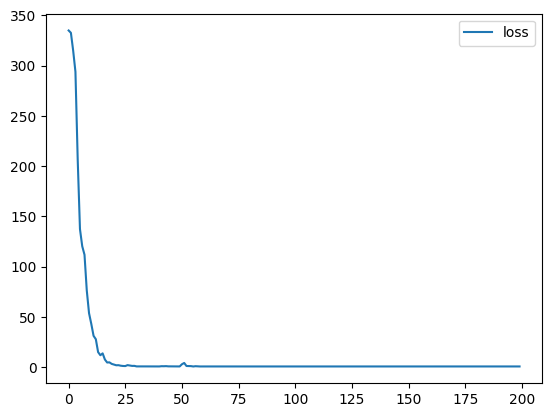

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [ ]:
model.layers

In [ ]:
model.layers[0].get_weights()

[array([[0.34457794]], dtype=float32), array([17.769896], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0,0]
a

0.34457794

6/6 [==============================] - 0s 2ms/step


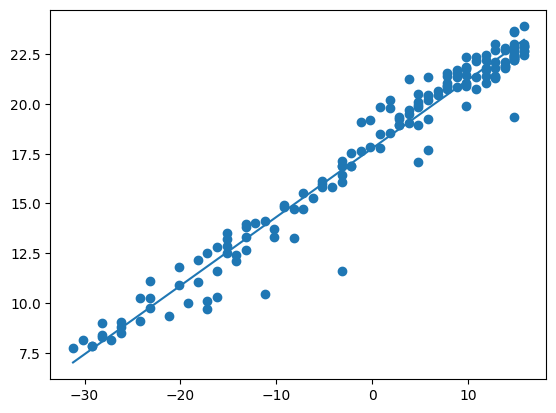

In [ ]:
# make sure the line fits the data
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat)

In [ ]:
# manual calculation

# get weights
w, b = model.layers[0].get_weights()

#Reshape X
X = X.reshape(-1,1)

# (Nx1) * (1x1) +(1) --> (N x 1) so need to flatten
Yhat2 = (X.dot(w) + b).flatten()

# dont use == for floating point
np.allclose(Yhat, Yhat2)

True